Projekt - Monte Carlo, przybliżanie wartości liczby pi.
Krzysztof Bugajski, 410939

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Na początek wygenerujemy 100 tys. punktów i zobaczymy jaką otrzymamy wartość pi. Punkty będą tworzone na podstawie niezależnie wylosowanych serii wartości X i Y z przedziału [0,1]. Algorytm sprawdza czy punkt znajduje się wewnątrz koła o promieniu 1 o środku w punkcie (0,0). Wartość pi to ilość punktów wewnątrz koła podzielona przez ilość wszystkich punktów pomnożona przez 4.

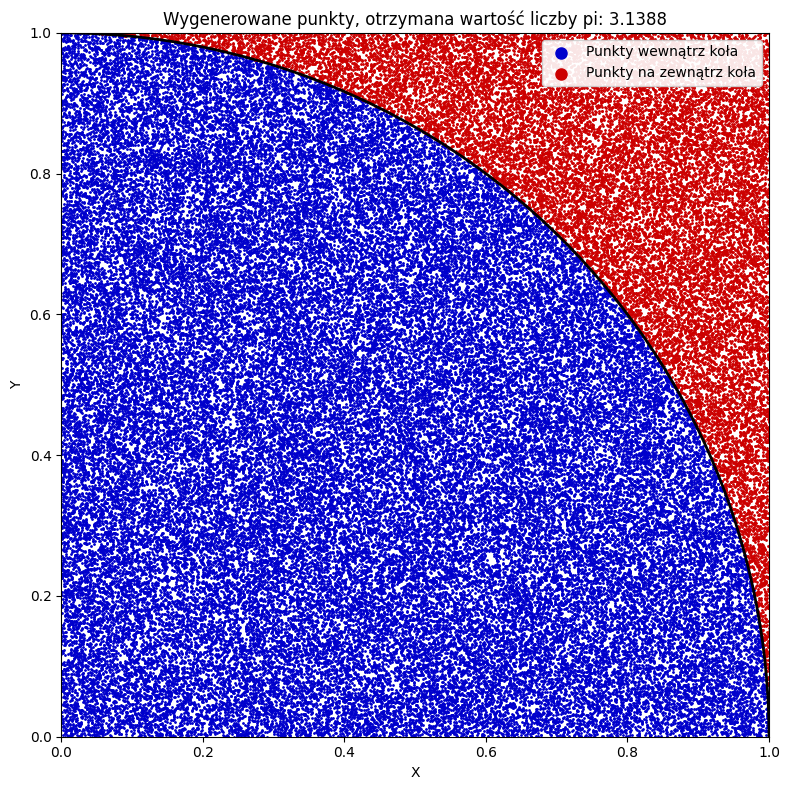

In [2]:
n = 100_000

x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
inside = x**2 + y**2 < 1
pi = 4 * np.sum(inside) / n

# Wykres
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x[inside], y[inside], c='#0000CC', label='Punkty wewnątrz koła', s=1)
ax.scatter(x[~inside], y[~inside], c='#CC0000', label='Punkty na zewnątrz koła', s=1)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

circle = plt.Circle((0, 0), 1, color='black', fill=False, lw=2)
ax.add_artist(circle)

ax.set_title(f"Wygenerowane punkty, otrzymana wartość liczby pi: {pi}")

ax.legend(loc='upper right', markerscale=8, fontsize=10, framealpha=0.9)

plt.tight_layout()

Dodatkowe wykresy dla 10 tys. punktów i 1 mln punktów.

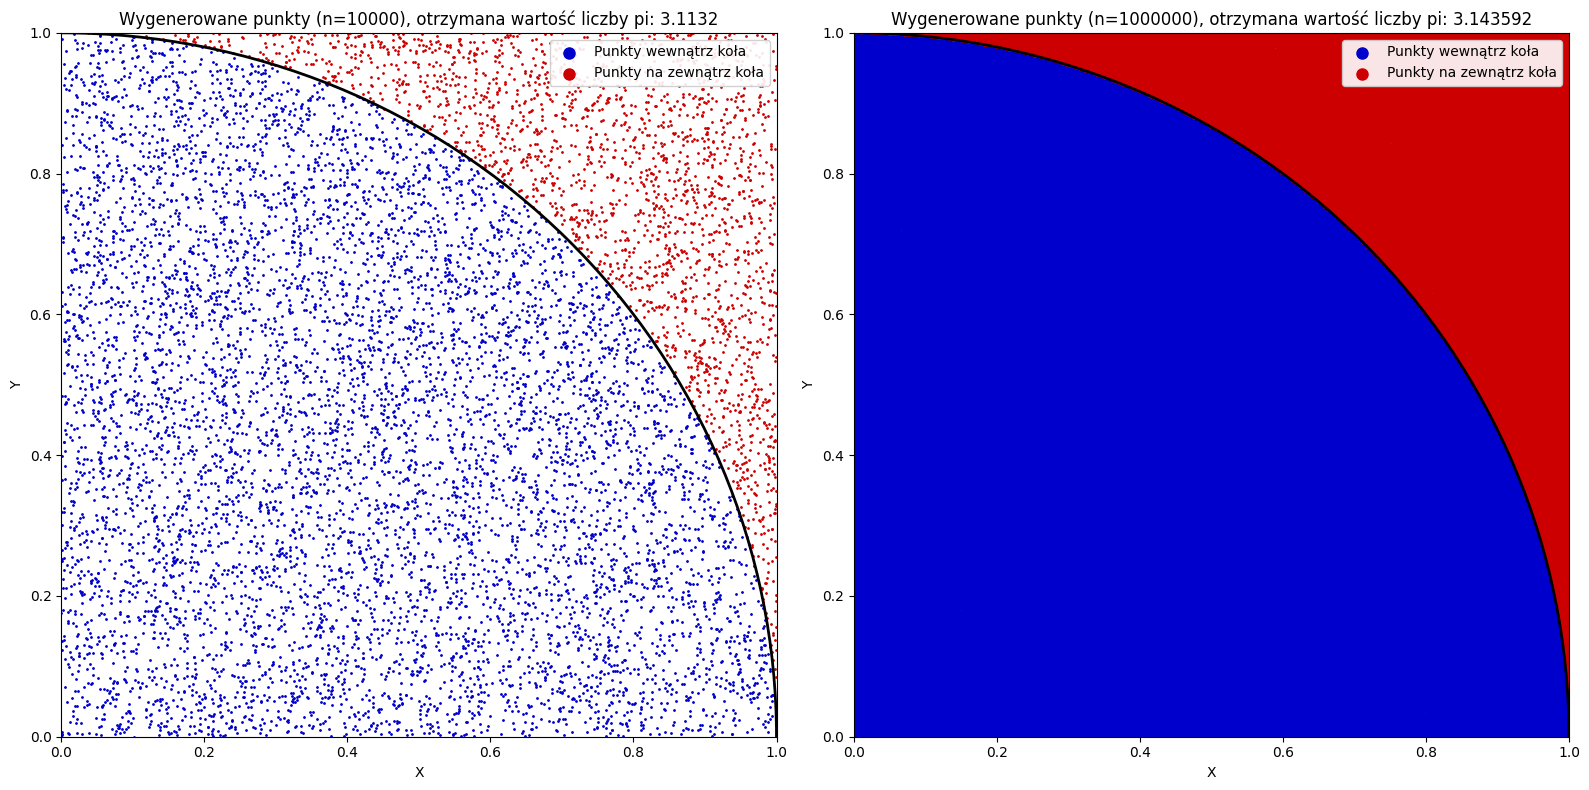

In [3]:
n1 = 10_000
n2 = 1000_000

x1 = np.random.uniform(0, 1, n1)
y1 = np.random.uniform(0, 1, n1)
inside1 = x1**2 + y1**2 < 1
pi1 = 4 * np.sum(inside1) / n1

x2 = np.random.uniform(0, 1, n2)
y2 = np.random.uniform(0, 1, n2)
inside2 = x2**2 + y2**2 < 1
pi2 = 4 * np.sum(inside2) / n2

# Wykres

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].scatter(x1[inside1], y1[inside1], c='#0000CC', label='Punkty wewnątrz koła', s=1)
ax[0].scatter(x1[~inside1], y1[~inside1], c='#CC0000', label='Punkty na zewnątrz koła', s=1)

ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

circle = plt.Circle((0, 0), 1, color='black', fill=False, lw=2)
ax[0].add_artist(circle)

ax[0].set_title(f"Wygenerowane punkty (n={n1}), otrzymana wartość liczby pi: {pi1}")

ax[0].legend(loc='upper right', markerscale=8, fontsize=10, framealpha=0.9)

ax[1].scatter(x2[inside2], y2[inside2], c='#0000CC', label='Punkty wewnątrz koła', s=1)
ax[1].scatter(x2[~inside2], y2[~inside2], c='#CC0000', label='Punkty na zewnątrz koła', s=1)

ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

circle = plt.Circle((0, 0), 1, color='black', fill=False, lw=2)
ax[1].add_artist(circle)

ax[1].set_title(f"Wygenerowane punkty (n={n2}), otrzymana wartość liczby pi: {pi2}")

ax[1].legend(loc='upper right', markerscale=8, fontsize=10, framealpha=0.9)
    

plt.tight_layout()

Jak można się domyślać, im więcej punktów tym dokładniejsza wartość pi, zobaczmy na wykresie jak wygląda dążenie do wartości pi wraz ze wzrostem ilości punktów.
Weźmiemy punkty rosnące od 10 do 100 tys. idące według wzoru 10, 20, ..., 100, 200, ..., 1000, 2000 itd.
Oś X będzie na skali logarytmicznej, dla większej przejrzystości.

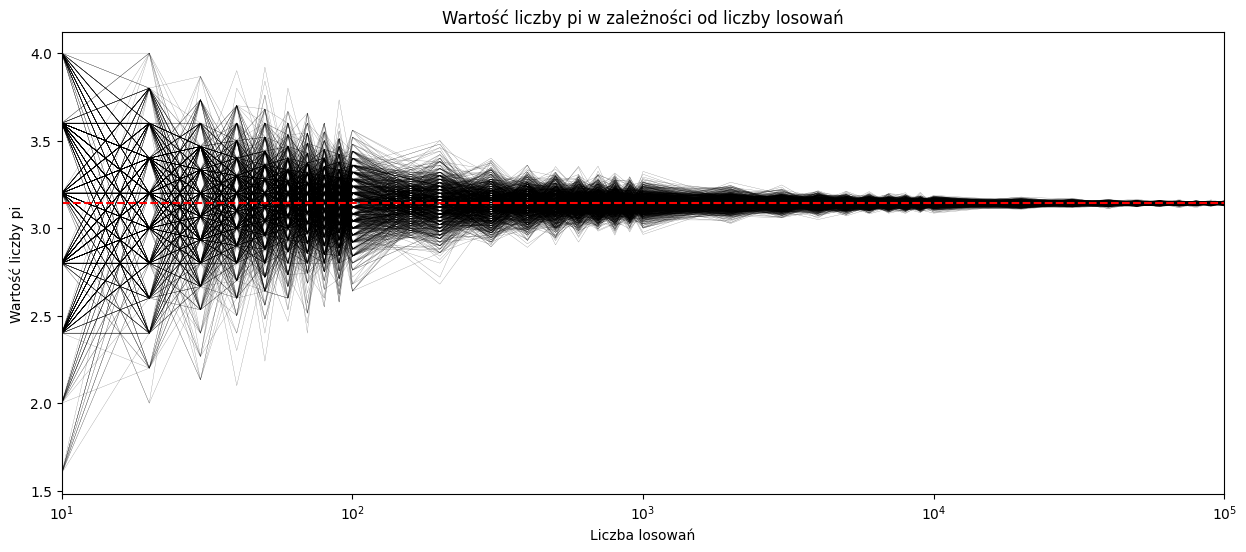

In [4]:
def generate_numbers(k):
    for i in range(2, k+1):
        yield from np.arange(1, 10) * 10 ** (i-1)
    yield 10 ** i

k = 5
n = list(generate_numbers(k))

def pi_monte_carlo(n):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    inside = x**2 + y**2 < 1
    return 4 * np.sum(inside) / n

# Wykres

fig, ax = plt.subplots(figsize=(15, 6))

for i in range(1000):
    pi_values = [pi_monte_carlo(i) for i in n]

    plt.plot(n, pi_values, label='Wartość liczby pi', alpha=0.5, color='black', linewidth=0.2)

plt.axhline(y=np.pi, color='r', linestyle='--', label='Wartość liczby pi')
plt.xlabel('Liczba losowań')
plt.ylabel('Wartość liczby pi')
plt.title('Wartość liczby pi w zależności od liczby losowań')
plt.xlim(10, 10**k)

ax.set_xscale('symlog')


Wraz ze wzrostem ilości punktów linie schodzą się do lini wyznaczającej wartość pi. Tempo wzrostu dokładności wynosi 1/√n, gdzie n to ilość punktów, co w praktyce oznacza, żeby podwoić dokładność trzeba wylosować 4 razy więcej punktów.

Kolejny wykres przedstawia wykresy pudełkowe dla 10, 100, ..., 1mln punktów. Rozkłady przedstawiane przez te wykresy stworzone są na podstawie 1000 prób dla każdej ilości punktów.
Widać jak zwiększa się dokładność wraz ze wzrostem ilości punktów, poprzez zmniejszenie zakresu na osiach Y.

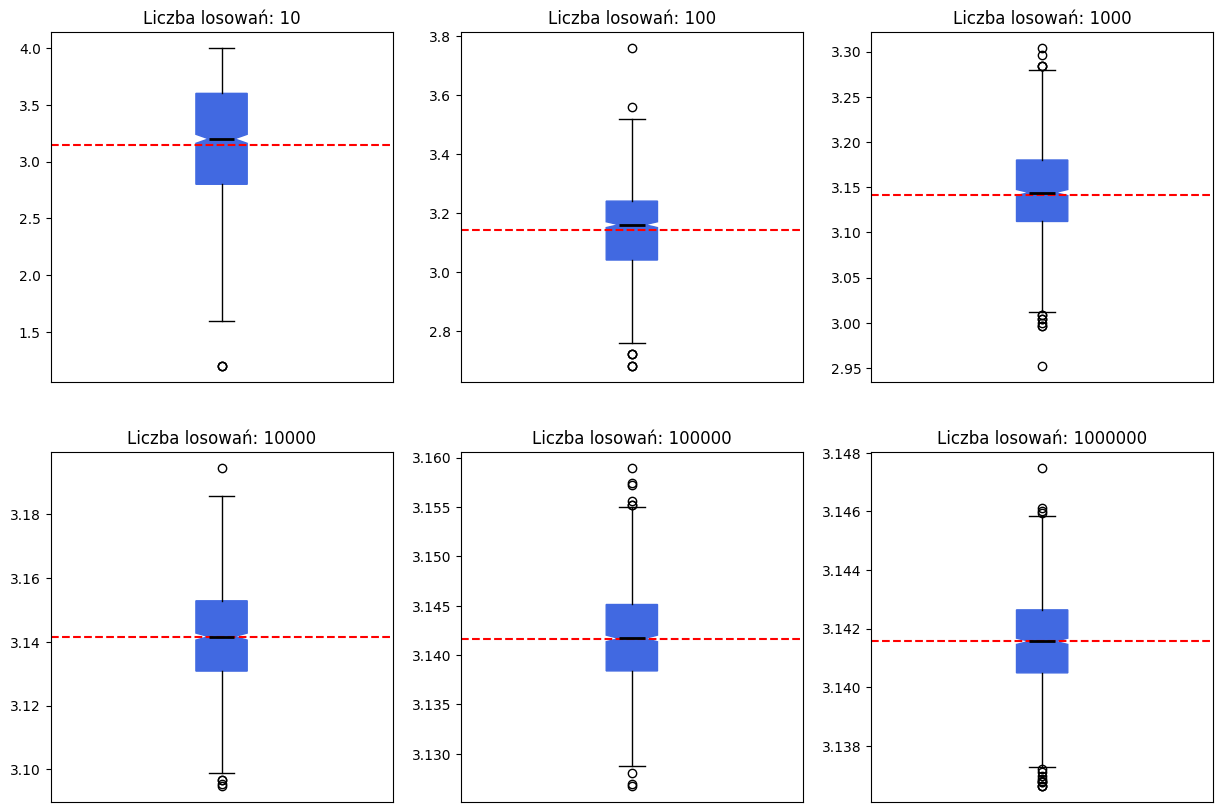

In [5]:

n = [10, 100, 1000, 10_000, 100_000, 1000_000]
pi_values = [pi_monte_carlo(i) for i in n]

# Wykres

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i in range(3):
    ax[0, i].boxplot([pi_monte_carlo(n[i]) for _ in range(1000)], notch=True, medianprops={'linewidth': 2, 'color': 'black'}, patch_artist=True, 
                        boxprops={'facecolor': 'royalblue', 'color': 'royalblue'})
    ax[0, i].set_title(f'Liczba losowań: {n[i]}')
    ax[0, i].set_xticks([])
    ax[0, i].axhline(y=np.pi, color='r', linestyle='--', label='Wartość liczby pi')

for i in range(3):
    ax[1, i].boxplot([pi_monte_carlo(n[i+3]) for _ in range(1000)], notch=True, medianprops={'linewidth': 2, 'color': 'black'}, patch_artist=True,
                        boxprops={'facecolor': 'royalblue', 'color': 'royalblue'})
    ax[1, i].set_title(f'Liczba losowań: {n[i+3]}')
    ax[1, i].set_xticks([])
    ax[1, i].axhline(y=np.pi, color='r', linestyle='--', label='Wartość liczby pi')
